In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import pandas as pd
import seaborn as sns

In [2]:
root_dir = '/content/gdrive' # Google Drive root dir
csvs_path = f'{root_dir}/MyDrive/Colab Notebooks/SLR Zotero'
figure_folder = csvs_path
columns_data = {
    'Title': str,
    'Publication Year': int,
    'Url': str,
    'Manual Tags': str,
}

# key is the new keyword, value is the list of keywords that will be replaced by the key
groups_of_keywords = {

}

# Vague keywords are not welcomed here
excluded_starting_by_keywords_at_csv_import = [
    "xmlns"
]
excluded_keywords_at_csv_import = [
  "[fe] full text",
  "[fe] ⭐ fav",
  "nan"
]
excluded_keywords_in_plot = [
  "federated learning",
  "federated learning (fl)",
  "learning systems",
  "privacy-preserving techniques",
  "privacy preserving",
  "machine learning",
  "data privacy",
  "computational modelling",
  "global models",
  "performance",
  "machine-learning",
  "servers",
  "training",
  "learning algorithms",
  "learning frameworks",
  "learning models",
  "computational modeling",
  "block-chain",
  "privacy protection",
  "artificial intelligence",
  "article",
  "human",
  "optimisations",
  "learning",
  "local model",
  "machine learning models",
  "deep neural networks",
  "reinforcement learnings",
  "privacy-preserving",
  "benchmarking",
  ]

In [3]:
excluded_keywords_in_plot = []

In [4]:
from google.colab import drive
drive.mount(root_dir)

Mounted at /content/gdrive


In [5]:
def parse_keyword(keyword: str) -> str:
  """
  Parses the keyword to remove characters such as "-" and "'" and also
  removes extra spaces and spaces to the beggining and end of keywords.

  Args:
    keyword (str): The keyword that will be processed.

  Returns:
    str: The processed keyword.
  """
  parsed_word = keyword.replace("-", " ").replace("'", " ").replace("[", " ")
  parsed_word = parsed_word.replace("]", " ").replace("+", " ").replace("%", " ")
  parsed_word = parsed_word.replace("$", " ").replace(">", " ").replace("<", " ")
  parsed_word = parsed_word.replace("/", " ").replace(".", " ").replace(",", " ")
  parsed_word = parsed_word.replace("–", " ").replace("&", " and ")
  return re.sub(r'\s+', ' ', parsed_word).strip()

def merge_keywords_removing_acronyms(keywords: list[str]) -> list[str]:
  """
  Creates a new list of keywords removing the duplicated items and acronyms. For example:
  Given an input list ["fl", "federated learning", "federated learning (fl)", "ml"]
  Returns the list ["federated learning", "ml"].

  Args:
    keywords (list[str]): The keyword list that will be processed.

  Returns:
    list[str]: The new keyword list without acronyms and without duplicated keywords.
  """
  unique_keywords = set()
  for keyword in keywords:
    if not is_acronym_present(keyword, keywords):
      unique_keywords.add(keyword)
  return list(unique_keywords)



def check_starting_letters_match(acronym: str, sentences: list[str]) -> bool:
    for sentence in sentences:
        words = sentence.split()
        if len(acronym) == len(words) and all(word.startswith(acronym[i]) for i, word in enumerate(words)):
            return True
    return False



def is_acronym_present(word: str, words: list[str]) -> bool:
  pattern = r'\((.*?)\)'
  word_parenthesis_match = re.search(pattern, word)
  term = word.strip()
  if word_parenthesis_match:
    term = word_parenthesis_match.group(1)
  if not ' ' in term:
    is_acronym = check_starting_letters_match(term, words)
    if is_acronym:
      return True
  return False



def create_keywords(row: pd.Series) -> list[str]:
  """
  Creates a list of unique keywords after normalizing the keywords.

  Args:
    row (pandas.Series): Single row of the DataFrame.

  Returns:
    list[str]: The list of processed keyword.
  """
  all_terms = [parse_keyword(term.lower()) for term in str(row["Manual Tags"]).split('; ') if (term.lower() not in excluded_keywords_at_csv_import) and not any(term.lower().startswith(excluded_word) for excluded_word in excluded_starting_by_keywords_at_csv_import)]
  return merge_keywords_removing_acronyms(all_terms)
  # return list(set(all_terms)) # remove duplicates before return

In [6]:
# LOAD CSV DATA

print('Loading:')
dfs = []
column_names = list(columns_data.keys())
for filename in os.listdir(csvs_path):
    if filename.endswith(".csv"):
      print(f'{filename} ', end="")
      csv_path = f'{csvs_path}/{filename}'
      csv = pd.read_csv(csv_path, sep=",", header=0, usecols=column_names, dtype=columns_data)
      csv['Keywords'] = csv.apply(lambda row: create_keywords(row), axis=1)
      dfs.append({"filename": filename, "data": csv})
      print(f'loaded!')

Loading:
SCOPUS SLR FL 2023 2024.csv loaded!


In [21]:
dfs[0]['data']

,Publication Year,Title,Url,Manual Tags,Keywords
0,2023,Long-Tailed Federated Learning Via Aggregated ...,https://www.scopus.com/inward/record.uri?eid=2...,Asynchronous update; Asynchronous Update; Fede...,"[iid data, mapping, learning systems, metalear..."
1,2023,Resource-Aware Knowledge Distillation for Fede...,https://www.scopus.com/inward/record.uri?eid=2...,Collaborative learning; Deep learning; Distill...,"[collaborative learning, knowledge distillatio..."
2,2023,Matching Game for Multi-task Federated Learnin...,https://www.scopus.com/inward/record.uri?eid=2...,Artificial intelligence; Data handling; Delay;...,"[job analysis, network utility, delays, resour..."
3,2023,FedPVD: Clustered Federated Learning with NoN-...,https://www.scopus.com/inward/record.uri?eid=2...,cluster; Cluster; Deterioration; Distributed m...,"[cluster, iid data, distributed machine learni..."
4,2023,Federated Learning - Opportunities and Applica...,https://www.scopus.com/inward/record.uri?eid=2...,'current; Application of federated learning; A...,"[applications of federated learning, research ..."
...,...,...,...,...,...
3725,2023,A Survey on IoT-Edge-Cloud Continuum Systems: ...,https://www.scopus.com/inward/record.uri?eid=2...,Learning systems; federated learning; machine ...,"[cloud based, blockchain, cloud based operatin..."
3726,2023,Federated reinforcement learning based intrusi...,https://www.scopus.com/inward/record.uri?eid=2...,Deep learning; Federated learning; Intrusion d...,"[deep q network, computer crime, network node,..."
3727,2023,On Adjusting Data Throughput in IoT Networks: ...,https://www.scopus.com/inward/record.uri?eid=2...,Federated Learning; IoT; Internet of Things; D...,"[signal to noise ratio, wireless sensor networ..."
3728,2023,MFC: A Multishot Approach to Federated Data Cl...,https://www.scopus.com/inward/record.uri?eid=2...,Federated Learning; Machine Learning; Federate...,"[data clustering, data distributed, multiple c..."


In [22]:
dfs[0]['data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3730 entries, 0 to 3729
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Publication Year  3730 non-null   int64 
 1   Title             3730 non-null   object
 2   Url               3730 non-null   object
 3   Manual Tags       3730 non-null   object
 4   Keywords          3730 non-null   object
dtypes: int64(1), object(4)
memory usage: 145.8+ KB


In [23]:
type(dfs[0]['data']["Keywords"])

pandas.core.series.Series

In [7]:
def remove_duplicates(df: pd.DataFrame, debug: bool = True) -> pd.DataFrame:
  total_num_papers = len(df)
  title_counts = df['Title'].value_counts()
  duplicated_num_papers = len(title_counts[title_counts > 1])
  df_unique = df.drop_duplicates(subset='Title')
  total_num_papers_after_drop = len(df_unique)
  expected_unique_papers = total_num_papers - duplicated_num_papers

  # Check if the unique df is consistent
  if total_num_papers_after_drop != expected_unique_papers:
      raise ValueError(f"The number of unique papers ({total_num_papers_after_drop}) does not match the expected value ({expected_unique_papers}).")

  if debug:
    print(f"The initial record count is {total_num_papers}, with {duplicated_num_papers} duplicate entries identified and removed. The new DataFrame record count is {total_num_papers_after_drop}.")

  return df_unique



def merge_df_without_duplicates(df1: pd.DataFrame, df2: pd.DataFrame, debug: bool = True) -> pd.DataFrame:
  concatenated_df = pd.concat([df1, df2])
  concatenated_df_unique = remove_duplicates(df=concatenated_df, debug=debug)
  return concatenated_df_unique



def replace_keywords_with_groups(df: pd.DataFrame, groups_of_keywords: dict[str, list[str]]) -> pd.DataFrame:
  df_copy = df.copy()
  for group_name, keywords in groups_of_keywords.items():
      for keyword in keywords:
          df_copy['Keywords'] = df_copy['Keywords'].apply(lambda x: list(set([group_name if item == keyword else item for item in x])))
  return df_copy

In [ ]:
# OPTIONAL CELL TO MERGE DATAFRAMES (0 + 1) and (2 + 3) -> 4 DF to 2 DF
#######################################################################

if len(dfs) == 4:
  print(f'Mergeing {dfs[0]["filename"]} and {dfs[1]["filename"]}...')
  merged_df1 = merge_df_without_duplicates(dfs[0]["data"], dfs[1]["data"])

  print(f'\nMergeing {dfs[2]["filename"]} and {dfs[3]["filename"]}...')
  merged_df2 = merge_df_without_duplicates(dfs[2]["data"], dfs[3]["data"])

  # Replace dfs
  dfs = [
    {"filename": "FL_2024.csv", "data": merged_df1},
    {"filename": "Coalitions.csv", "data": merged_df2}
  ]

Mergeing SCOPUS_SLR_FL_2024.csv and WoS_SLR_FL_2024.csv...
The total number of records (df1 + df2) before merge is 558, and the resulting df removed 81 duplicated records.
New total number of records: 477.

Mergeing SCOPUS_SLR_FL_Coalition.csv and WoS_SLR_FL_Coalition.csv...
The total number of records (df1 + df2) before merge is 66, and the resulting df removed 25 duplicated records.
New total number of records: 41.


In [ ]:
# OPTIONAL CELL TO MERGE DATAFRAMES (0 + 1) -> 2 DF to 1 DF
###########################################################

if len(dfs) == 2:
  print(f'\nMergeing {dfs[0]["filename"]} and {dfs[1]["filename"]}...')
  merged_df = merge_df_without_duplicates(dfs[0]["data"], dfs[1]["data"])
  dfs = [
      {"filename": "prueba.csv", "data": merged_df},
  ]


Mergeing SCOPUS_SLR_FL_2024.csv and WoS_SLR_FL_2024.csv...
The total number of records (df1 + df2) before merge is 558, and the resulting df removed 81 duplicated records.
New total number of records: 477.


In [8]:
dfs[0]["data"]

,Publication Year,Title,Url,Manual Tags,Keywords
0,2023,Long-Tailed Federated Learning Via Aggregated ...,https://www.scopus.com/inward/record.uri?eid=2...,Asynchronous update; Asynchronous Update; Fede...,"[iid data, mapping, learning systems, metalear..."
1,2023,Resource-Aware Knowledge Distillation for Fede...,https://www.scopus.com/inward/record.uri?eid=2...,Collaborative learning; Deep learning; Distill...,"[collaborative learning, knowledge distillatio..."
2,2023,Matching Game for Multi-task Federated Learnin...,https://www.scopus.com/inward/record.uri?eid=2...,Artificial intelligence; Data handling; Delay;...,"[job analysis, network utility, delays, resour..."
3,2023,FedPVD: Clustered Federated Learning with NoN-...,https://www.scopus.com/inward/record.uri?eid=2...,cluster; Cluster; Deterioration; Distributed m...,"[cluster, iid data, distributed machine learni..."
4,2023,Federated Learning - Opportunities and Applica...,https://www.scopus.com/inward/record.uri?eid=2...,'current; Application of federated learning; A...,"[applications of federated learning, research ..."
...,...,...,...,...,...
3725,2023,A Survey on IoT-Edge-Cloud Continuum Systems: ...,https://www.scopus.com/inward/record.uri?eid=2...,Learning systems; federated learning; machine ...,"[cloud based, blockchain, cloud based operatin..."
3726,2023,Federated reinforcement learning based intrusi...,https://www.scopus.com/inward/record.uri?eid=2...,Deep learning; Federated learning; Intrusion d...,"[deep q network, computer crime, network node,..."
3727,2023,On Adjusting Data Throughput in IoT Networks: ...,https://www.scopus.com/inward/record.uri?eid=2...,Federated Learning; IoT; Internet of Things; D...,"[signal to noise ratio, wireless sensor networ..."
3728,2023,MFC: A Multishot Approach to Federated Data Cl...,https://www.scopus.com/inward/record.uri?eid=2...,Federated Learning; Machine Learning; Federate...,"[data clustering, data distributed, multiple c..."


In [ ]:
# EXAMPLE OF USING KEYWORD GROUPS
#################################

df_copy = dfs[0]["data"].copy()
print(len(df_copy.iloc[0]["Keywords"]), df_copy.iloc[0]["Keywords"])

gr = {"nn": [
 'catastrophic forgetting',
 'computer crime',
 'distributed computer systems',
 'intrusion detection system',
 'continual learning',
]}

df_copy = replace_keywords_with_groups(df_copy, gr)
print(len(df_copy.iloc[0]["Keywords"]), df_copy.iloc[0]["Keywords"])

19 ['incremental learning', 'intrusion detection system', 'distillation', 'continual learning', 'intrusion detection systems', 'network security', 'distributed computation', 'distributed computer systems', 'data privacy', 'computer crime', 'local model', 'learning systems', 'distributed intrusion detection', 'distributed computations', 'intrusion detection', 'work sites', 'loss functions', 'catastrophic forgetting', 'federated learning']
15 ['intrusion detection', 'intrusion detection systems', 'incremental learning', 'network security', 'distributed computation', 'nn', 'distillation', 'work sites', 'distributed computations', 'data privacy', 'local model', 'loss functions', 'learning systems', 'federated learning', 'distributed intrusion detection']


In [8]:
def get_keyword_counts(df: pd.DataFrame, groups_of_keywords: dict[str, list[str]] = None, excluded_keywords: list[str] = None) -> pd.Series:
  df_copy = df.copy()

  # Group keywords (will reduce the number of keywords)
  if groups_of_keywords:
    df_copy = replace_keywords_with_groups(df_copy, groups_of_keywords)

  # Flatten the lists in Keywords into a single list (with duplicates) -> all keywords to a single 1D list
  all_keywords = [keyword for keywords in df_copy['Keywords'] for keyword in keywords]

  # Count the occurrences of each unique keyword
  keyword_counts = pd.Series(all_keywords).value_counts()

  # Filter the excluded keywords
  keyword_counts_filtered = keyword_counts
  if excluded_keywords:
    keyword_counts_filtered = keyword_counts[~keyword_counts.index.isin(excluded_keywords)]

  return keyword_counts_filtered



def get_unique_keywords(keyword_counts: pd.Series, excluded_keywords: list[str] = None) -> list[str]:
  if not excluded_keywords:
    excluded_keywords = []
  return [keyword for keyword in keyword_counts.keys() if keyword not in excluded_keywords]



def write_to_file(words: list[str], filename: str) -> None:
  with open(filename, 'w') as f:
        for word in words:
            f.write(word + '\n')



def plot_n_most_popular_topics(filename: str, title: str, n: int, df: pd.DataFrame, groups_of_keywords: dict[str, list[str]] = None, excluded_keywords: list[str] = None):
  top_n_items = get_n_most_popular_topics(n, df, groups_of_keywords, excluded_keywords).dropna()

  # Plotting
  plt.figure(figsize=(10, 6))
  #sns.barplot(x=top_n_items.values, y=top_n_items.index, palette="viridis")
  sns.barplot(x=top_n_items.values, y=top_n_items.index, palette="viridis", hue=top_n_items.index, dodge=False, legend=False)
  plt.xlabel('Count')
  plt.ylabel('Topic')
  plt.title(title)
  # plt.show()

  # Save the plot in PDF format
  plt.savefig(f"{filename}.pdf", bbox_inches="tight")



def get_n_most_popular_topics(n: int, df: pd.DataFrame, groups_of_keywords: dict[str, list[str]] = None, excluded_keywords: list[str] = None) -> pd.Series:
  item_counts_filtered = get_keyword_counts(df, groups_of_keywords, excluded_keywords)

  # Get the top n most common occurrences
  return item_counts_filtered.head(n)

In [9]:
df = dfs[0]["data"]
keyword_counts_filtered = get_keyword_counts(df, groups_of_keywords, excluded_keywords_in_plot)
unique_keywords = get_unique_keywords(keyword_counts_filtered, excluded_keywords_in_plot)
print(len(unique_keywords), unique_keywords[:10])

13252 ['federated learning', 'learning systems', 'data privacy', 'machine learning', 'privacy preserving techniques', 'deep learning', 'internet of things', 'computational modelling', 'privacy preserving', 'privacy']


In [10]:
# CHECK KEYWORDS WITH NON-ALPHANUMERIC CHARACTERS
#################################################

def get_non_alphanumerics(words: list[str]):
  pattern = re.compile(r'[^a-zA-Z0-9\s]')
  return [w for w in words if re.search(pattern, w)]

non_alphanumerics = get_non_alphanumerics(unique_keywords)
print(len(non_alphanumerics), non_alphanumerics)

256 ['classification (of information)', 'quantization (signal)', 'unmanned aerial vehicles (uav)', 'convolutional neural networks (cnns)', 'gaussian noise (electronic)', 'trees (mathematics)', 'social networking (online)', 'codes (symbols)', 'multiarmed bandits (mabs)', 'android (operating system)', 'encoding (symbols)', 'gateways (computer networks)', 'plants (botany)', 'vehicular adhoc networks (vanets)', 'communication channels (information theory)', 'wireless local area networks (wlan)', 'internet of things (iot)', 'robustness (control systems)', 'unmanned aerial vehicles (uavs)', 'reinforcement (psychology)', 'over the air computation (aircomp)', 'feature learning (machine learning)', 'particle swarm optimization (pso)', 'application programming interfaces (api)', 'charging (batteries)', 'electroencephalogram (eeg)', 'digital twin (dt)', 'field programmable gate arrays (fpga)', 'alzheimer’s disease', 'degrees of freedom (mechanics)', 'c (programming language)', 'intrusion detectio

In [12]:
# OPTIONAL CELL TO WRITE UNIQUE KEYWORDS TO A FILE TEXT
#######################################################
df = dfs[0]["data"]
keyword_counts_filtered = get_keyword_counts(df, groups_of_keywords, excluded_keywords_in_plot)
unique_keywords = get_unique_keywords(keyword_counts_filtered, excluded_keywords_in_plot)
filename = f'/content/unique_keywords{len(keyword_counts_filtered)}.txt'
write_to_file(unique_keywords, filename)

SCOPUS SLR FL 2023 2024


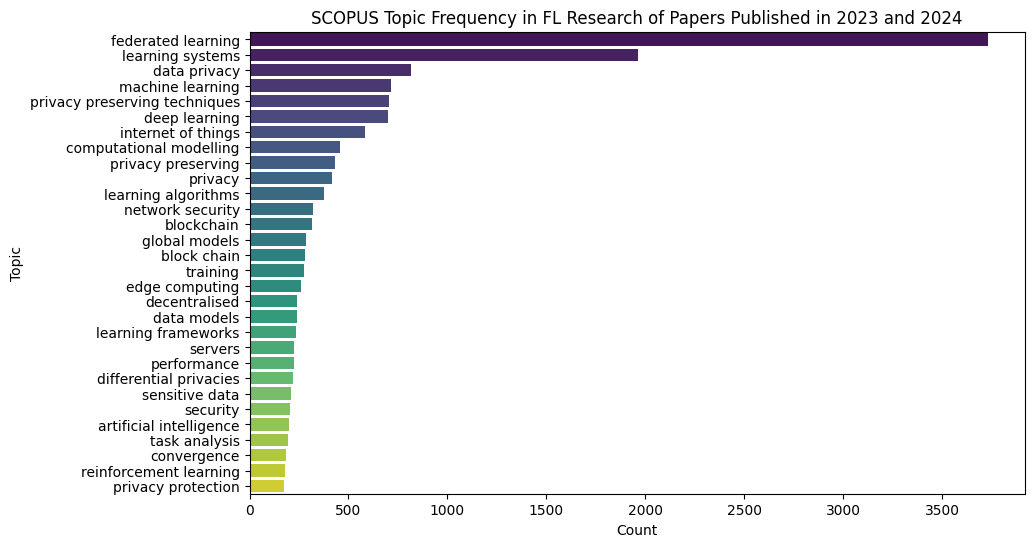

In [13]:
filename2title = {
    'SCOPUS_SLR_FL_2024.csv': 'SCOPUS Topic Frequency in FL Research of Papers Published in 2024',
    'WoS_SLR_FL_2024.csv': 'Web of Science Topic Frequency in FL Research of Papers Published in 2024',
    'SCOPUS_SLR_FL_Coalition.csv': 'SCOPUS Topic Frequency in FL with Coalitions Research of Papers',
    'WoS_SLR_FL_Coalition.csv': 'Web of Science Topic Frequency in FL with Coalitions Research of Papers',
    'FL_2024.csv': 'Topic Frequency in FL Research of Papers Published in 2024',
    'Coalitions.csv': 'Topic Frequency in FL with Coalitions Research of Papers',
    'Grouped_FL_2024.csv': 'Topic Frequency in FL Research of Papers Published in 2024',
    'Grouped_Coalitions.csv': 'Topic Frequency in FL with Coalitions Research of Papers',
    'Grouped_Coalitions.csv': 'Topic Frequency in FL with Coalitions Research of Papers',
    'SCOPUS SLR FL 2023 2024.csv': 'SCOPUS Topic Frequency in FL Research of Papers Published in 2023 and 2024',
}

n = 30
for df in dfs:
  filename, df = df['filename'], df['data']
  title = filename2title[filename]
  filename_without_extension = filename[:-4]
  print(filename_without_extension)
  plot_n_most_popular_topics(f'{figure_folder}/{filename_without_extension}', title, n, df, groups_of_keywords, excluded_keywords=excluded_keywords_in_plot)

# Clustering of keywords

## Cosine similarity with TF-IDF vectors

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

def cluster_keywords(keywords: list[str], distance_threshold: float = 0.5) -> list[list[str]]:
    # TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(keywords)

    # Compute pairwise cosine similarity
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=distance_threshold, metric='precomputed')
    clusters = clustering.fit_predict(1 - similarity_matrix)

    # Organize keywords into clusters
    clustered_keywords = {}
    for idx, keyword in enumerate(keywords):
        cluster_label = clusters[idx]
        if cluster_label not in clustered_keywords:
            clustered_keywords[cluster_label] = []
        clustered_keywords[cluster_label].append(keyword)

    return list(clustered_keywords.values())

def get_keyword_synonyms_groups(cluster_keywords: list[list[str]]) -> dict[str, list[str]]:
    output_dict = {}
    for sublist in cluster_keywords:
        main_term = sublist[0]
        synonyms = sublist[1:]
        output_dict[main_term] = synonyms
    return output_dict

def get_keyword_synonyms_groups_n_times(n: int, keyword_list: list[str]) -> dict[str, list[str]]:
  synonyms_groups = None
  input_list = keyword_list
  for i in range(0, n):
    print(f"iteration {i + 1}/{n}: \t", end="")
    keyword_clusters = cluster_keywords(input_list)
    synonyms_groups = get_keyword_synonyms_groups(keyword_clusters)
    input_list = list(synonyms_groups.keys())
    print(f"{len(input_list)} keywords.")
  return synonyms_groups

In [33]:
num_keywords = 0
keyword_clusters = cluster_keywords(unique_keywords)
synonyms_groups = get_keyword_synonyms_groups(keyword_clusters)
for key, value in synonyms_groups.items():
  synonyms_groups[key].insert(0, key)
  num_keywords += len(synonyms_groups[key])
print(f"Consistency of keywords (counted keywords = {num_keywords}; number of unique_keywords = {len(unique_keywords)}): {num_keywords == len(unique_keywords)}")
print(f"Unique keys before: {len(unique_keywords)} -> Number of groups after: {len(synonyms_groups.keys())}")
print("Sample:", dict(list(synonyms_groups.items())[:3]))

Consistency of keywords (counted keywords = 13252; number of unique_keywords = 13252): True
Unique keys before: 13252 -> Number of groups after: 4754
Sample: {'federated learning': ['federated learning', 'federated learning system', 'personalized federated learning', 'heterogeneous federated learning', 'personalized and federated learning', 'federated edge learning', 'personalized federated learning service system', 'federated learning service system'], 'learning systems': ['learning systems', 'network systems', 'data systems'], 'data privacy': ['data privacy', 'privacy', 'privacy computing', 'privacy models', 'model privacy', 'd privacy', 'network privacy']}


In [22]:
num_keywords = 0
synonyms_groups2 = get_keyword_synonyms_groups_n_times(2, unique_keywords)
for key, value in synonyms_groups2.items():
  synonyms_groups2[key].insert(0, key)
  num_keywords += len(synonyms_groups2[key])
print(f"Consistency of keywords (counted keywords = {num_keywords}; number of unique_keywords = {len(unique_keywords)}): {num_keywords == len(unique_keywords)}")

iteration 1/2: 	4750 keywords.
iteration 2/2: 	4013 keywords.
Consistency of keywords: False


In [13]:
print(len(synonyms_groups.keys()), synonyms_groups.keys())

4750 dict_keys(['federated learning', 'learning systems', 'data privacy', 'machine learning', 'privacy preserving techniques', 'deep learning', 'internet of things', 'computational modelling', 'learning algorithms', 'network security', 'blockchain', 'global models', 'block chain', 'training', 'edge computing', 'decentralised', 'data models', 'learning frameworks', 'servers', 'performance', 'differential privacies', 'sensitive data', 'artificial intelligence', 'task analysis', 'convergence', 'reinforcement learning', 'privacy protection', 'local model', 'optimisations', 'differential privacy', 'forecasting', 'energy utilization', 'learning models', 'job analysis', 'computational modeling', 'human', 'classification (of information)', 'neural networks', 'article', 'efficiency', 'centralised', 'iterative methods', 'deep neural networks', 'diagnosis', 'optimization', 'distributed learning', 'adaptation models', 'digital storage', 'poisoning attacks', 'medical imaging', 'reinforcement learni

In [49]:
synonyms_groups3 = get_keyword_synonyms_groups_n_times(20, unique_keywords)

iteration 1/20: 	4756 keywords.
iteration 2/20: 	4016 keywords.
iteration 3/20: 	3795 keywords.
iteration 4/20: 	3710 keywords.
iteration 5/20: 	3659 keywords.
iteration 6/20: 	3627 keywords.
iteration 7/20: 	3604 keywords.
iteration 8/20: 	3587 keywords.
iteration 9/20: 	3574 keywords.
iteration 10/20: 	3564 keywords.
iteration 11/20: 	3554 keywords.
iteration 12/20: 	3546 keywords.
iteration 13/20: 	3539 keywords.
iteration 14/20: 	3534 keywords.
iteration 15/20: 	3529 keywords.
iteration 16/20: 	3524 keywords.
iteration 17/20: 	3520 keywords.
iteration 18/20: 	3517 keywords.
iteration 19/20: 	3514 keywords.
iteration 20/20: 	3510 keywords.


In [64]:
synonyms_groups

{'federated learning': ['federated learning',
  'federated learning system',
  'personalized federated learning',
  'heterogeneous federated learning',
  'personalized and federated learning',
  'iot and federated learning',
  'federated edge learning',
  'federated learning.',
  'personalized federated learning service system',
  'federated learning service system'],
 'learning systems': ['learning systems', 'network systems', 'data systems'],
 'data privacy': ['data privacy',
  'privacy',
  'privacy computing',
  'privacy models',
  'model privacy',
  'd privacy',
  'network privacy',
  'privacy.'],
 'machine learning': ['machine learning',
  'distributed machine learning',
  'machine learning models',
  'e learning',
  'learning',
  'q learning',
  'machine learning applications',
  'machine learning systems',
  'federated machine learning',
  'edge machine learning',
  'machine learning security',
  'quantum machine learning',
  'machine 2 machine',
  'deep learning and machine lea

In [ ]:
keyword_clusters = cluster_keywords(unique_keywords)
synonyms_groups = get_keyword_synonyms_groups(keyword_clusters)
print(len(synonyms_groups.keys()))

keyword_clusters = cluster_keywords(list(synonyms_groups.keys()))
synonyms_groups = get_keyword_synonyms_groups(keyword_clusters)
print(len(synonyms_groups.keys()))



print(synonyms_groups.items())

1542
1379
dict_items([('federated learning', ['vertical federated learning', 'decentralized federated learning', 'asynchronous federated learning', 'hierarchical federated learning', 'hybrid federated learning', 'asynchronoi federated learning', 'federated learning-mac']), ('learning systems', []), ('data privacy', ['data privacy protections']), ('privacy-preserving techniques', []), ('deep learning', ['actor-critic deep reinforcement learning']), ('internet of things', ['industrial internet of thing', 'internet of vehicle']), ('computational modelling', ['solid modelling']), ('machine learning', ['distributed machine learning', 'privacy in machine learning', 'edge machine learning']), ('nan', []), ('training', ['personnel training', 'fitness training']), ('data models', ['global models']), ('servers', []), ('learning algorithms', ['evaluation of learning algorithms']), ('task analysis', ['multi-task learning']), ('learning frameworks', []), ('network security', ['security strategies']

## Synset

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
from nltk.corpus import wordnet

# Function to find the synset (group of synonymous words) for a word
def get_synset(word: str):
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            if lemma.name() == word:
                return synset.name()
    return None

def get_keyword_synset_group(keyword_list: list[str]) -> list[str]:
  # Group keywords by their synsets
  keyword_groups = {}
  for keyword in keyword_list:
      synset = get_synset(keyword)
      if synset:
          if synset not in keyword_groups:
              keyword_groups[synset] = []
          keyword_groups[synset].append(keyword)
      else:
          if "[others]" not in keyword_groups:
              keyword_groups["[others]"] = []
          keyword_groups["[others]"].append(keyword)
  return keyword_groups

In [39]:
synonyms_groups_names = list(synonyms_groups.keys())
kyg = get_keyword_synset_group(synonyms_groups)

In [52]:
print(f"{len(synonyms_groups.keys())} -> {len(kyg.keys()) + len(kyg['[others]'])}")
print(f"number of keywords without synsets: {len(kyg['[others]'])}", kyg['[others]'][:10])
print(kyg.keys())

4756 -> 4746
number of keywords without synsets: 4317 ['federated learning', 'learning systems', 'data privacy', 'machine learning', 'privacy preserving techniques', 'deep learning', 'internet of things', 'computational modelling', 'learning algorithms', 'network security']
dict_keys(['[others]', 'training.n.01', 'decentralized.a.01', 'performance.n.01', 'convergence.n.01', 'prediction.n.02', 'homo.n.02', 'article.n.01', 'efficiency.n.01', 'centralized.a.01', 'diagnosis.n.01', 'optimization.n.01', 'distillation.n.01', 'cryptanalysis.n.01', 'whirl.n.02', 'world.n.08', 'bandwidth.n.01', 'costs.n.01', 'algorithm.n.01', 'learn.v.01', 'collaboration.n.01', 'semantics.n.01', 'current.n.01', 'healthcare.n.01', 'fairness.n.01', 'robustness.n.01', 'delay.n.01', 'authentication.n.01', 'quantization.n.01', 'topology.n.01', 'scalability.n.01', 'generalization.n.02', 'automation.n.01', 'transformer.n.01', 'scheduling.n.01', 'categorization.n.03', 'encoding.n.01', 'uncertainty.n.01', 'communication.

In [53]:
# Convert the dictionary kyg to a Pandas Series
kyg_series = pd.Series(kyg)

# Count the number of values (keywords) in each key (synset)
synset_counts = kyg_series.apply(len)
counts_greater_than_1 = (synset_counts > 1).sum()
print(f"Number of groups with more than 1 items: {counts_greater_than_1}")

# Get the top 10 keys with the most values
print(synset_counts.nlargest(10))

Number of groups with more than 1 items: 12
[others]               4317
optimization.n.01         2
cryptanalysis.n.01        2
minimization.n.01         2
regularization.n.01       2
biometrics.n.01           2
alliance.n.03             2
aged.n.01                 2
scaling.n.01              2
distortion.n.01           2
dtype: int64


In [48]:
kyg["optimization.n.01"]

['optimization', 'optimisation']

## Transformers

In [12]:
!pip install sentence-transformers > /dev/null

In [15]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.cluster import AgglomerativeClustering

In [13]:
def consistency_check(generated_dict: dict[str, list[str]], original_list: list[str]) -> bool:
  num_keywords = 0
  for key, value in generated_dict.items():
    generated_dict[key].insert(0, key)
    num_keywords += len(generated_dict[key])
  print(f"Consistency of keywords (counted keywords = {num_keywords}; number of items in the original_list = {len(original_list)}): {num_keywords == len(original_list)}")
  return num_keywords == len(original_list)

In [42]:


def group_keywords_by_semantic_similarity(keywords):
    # Load a pre-trained BERT model for computing embeddings
    model = SentenceTransformer('bert-base-nli-mean-tokens')

    # Compute embeddings for each keyword
    keyword_embeddings = model.encode(keywords)

    # Cluster the embeddings using KMeans
    num_clusters = int(len(keywords) / 10)
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(keyword_embeddings)

    # Initialize a defaultdict to store groups
    keyword_groups = defaultdict(list)

    # Populate the groups
    for keyword, label in zip(keywords, cluster_labels):
        keyword_groups[label].append(keyword)

    # Convert defaultdict to regular dictionary
    keyword_groups = dict(keyword_groups)

    return keyword_groups

# Example usage
keyword_groups = group_keywords_by_semantic_similarity(unique_keywords)

print(len(keyword_groups), keyword_groups)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1325 {1021: ['federated learning', 'federated learning system', 'vertical federated learning', 'hierarchical federated learning', 'clustered federated learning', 'horizontal federated learning', 'federated transfer learning', 'federated learning framework', 'hierarchical federated learning framework', 'federated edge learning', 'federated submodel learning', 'hierarchical federated edge learning', 'federated learning service framework', 'federated learning and model sparsification', 'federated learning tool', 'federated learning tools', 'vertical horizontal federated learning', 'federated learning service system', 'centralized federated learning', 'cluster federated learning', 'iot and federated learning', 'applications of federated learning', 'application of federated learning', 'utility preserving federated learning', 'model aggregation in federated learning', 'vertical federated learning r framework', 'federated learning as a service', 'federated learning based framework', 'federate

In [43]:
num_keywords = 0
for key, value in keyword_groups.items():
  keyword_groups[key].insert(0, key)
  num_keywords += len(keyword_groups[key])
print(f"Consistency of keywords (counted keywords = {num_keywords}; number of unique_keywords = {len(unique_keywords)}): {num_keywords == len(unique_keywords)}")

Consistency of keywords (counted keywords = 14577; number of unique_keywords = 13252): False


In [17]:
def group_keywords_by_semantic_similarity(keywords: list[str], distance_theshold: float = 0.5):
    # Load a pre-trained BERT model for computing embeddings
    model = SentenceTransformer('allenai-specter2')

    # Compute embeddings for each keyword
    keyword_embeddings = model.encode(keywords)

    # Determine the number of clusters using agglomerative clustering
    clustering = AgglomerativeClustering(distance_threshold=distance_theshold, n_clusters=None)
    cluster_labels = clustering.fit_predict(keyword_embeddings)

    # Determine the number of clusters found
    num_clusters = max(cluster_labels) + 1

    # Initialize a defaultdict to store groups
    keyword_groups = defaultdict(list)

    # Populate the groups
    for keyword, label in zip(keywords, cluster_labels):
        keyword_groups[label].append(keyword)

    # Convert defaultdict to regular dictionary
    keyword_groups = dict(keyword_groups)

    return keyword_groups

# Example usage
keyword_groups = group_keywords_by_semantic_similarity(unique_keywords)

print(len(keyword_groups), keyword_groups)


13250 {12281: ['federated learning'], 7284: ['learning systems'], 10689: ['data privacy'], 12489: ['machine learning'], 13101: ['privacy preserving techniques'], 12317: ['deep learning'], 10346: ['internet of things'], 9151: ['computational modelling'], 12132: ['privacy preserving'], 10414: ['privacy'], 12712: ['learning algorithms'], 12688: ['network security'], 11935: ['blockchain'], 9953: ['global models'], 8365: ['block chain'], 10072: ['training'], 9958: ['edge computing'], 10182: ['decentralised'], 12585: ['data models'], 7144: ['learning frameworks'], 11737: ['servers'], 10148: ['performance'], 7864: ['differential privacies'], 8520: ['sensitive data'], 10284: ['security'], 12224: ['artificial intelligence'], 7611: ['task analysis'], 10933: ['convergence'], 12484: ['reinforcement learning'], 12203: ['privacy protection'], 12894: ['distributed machine learning'], 8935: ['local model'], 10012: ['optimisations'], 12137: ['differential privacy'], 11700: ['forecasting'], 10111: ['ene

In [21]:
def group_keywords_by_semantic_similarity(keywords: list[str], distance_threshold: float = 0.5):
    # Load a pre-trained BERT model for computing embeddings
    model = SentenceTransformer('allenai-specter')

    # Compute embeddings for each keyword
    keyword_embeddings = model.encode(keywords)

    # Perform single-linkage hierarchical clustering
    clustering = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, linkage='single')
    cluster_labels = clustering.fit_predict(keyword_embeddings)

    # Initialize a defaultdict to store groups
    keyword_groups = defaultdict(list)

    # Populate the groups
    for label, keyword in zip(cluster_labels, keywords):
        keyword_groups[label].append(keyword)

    # Convert defaultdict to regular dictionary
    keyword_groups = dict(keyword_groups)

    return keyword_groups

# Example usage
keyword_groups = group_keywords_by_semantic_similarity(unique_keywords)

print(len(keyword_groups), keyword_groups)

13250 {12166: ['federated learning'], 9873: ['learning systems'], 10938: ['data privacy'], 12717: ['machine learning'], 13094: ['privacy preserving techniques'], 6893: ['deep learning'], 9631: ['internet of things'], 11721: ['computational modelling'], 12397: ['privacy preserving'], 7444: ['privacy'], 12681: ['learning algorithms'], 12653: ['network security'], 11718: ['blockchain'], 7748: ['global models'], 11891: ['block chain'], 9787: ['training'], 6654: ['edge computing'], 10342: ['decentralised'], 12536: ['data models'], 7624: ['learning frameworks'], 9264: ['servers'], 8744: ['performance'], 8259: ['differential privacies'], 7608: ['sensitive data'], 9003: ['security'], 10322: ['artificial intelligence'], 9495: ['task analysis'], 11075: ['convergence'], 12416: ['reinforcement learning'], 12128: ['privacy protection'], 12877: ['distributed machine learning'], 7158: ['local model'], 11845: ['optimisations'], 11984: ['differential privacy'], 8544: ['forecasting'], 9236: ['energy uti

In [22]:
consistency_check(keyword_groups, unique_keywords)

Consistency of keywords (counted keywords = 26502; number of items in the original_list = 13252): False


False

# SQL

In [15]:
import sqlite3

# Specify column mapping
column_mapping = {
    'Title': 'title',
    'Publication Year': 'publication_year',
    'Url': 'url'
}
df = dfs[0]["data"].copy()
df_name = dfs[0]["filename"]
df = df.rename(columns=column_mapping)

## Creation and population of the DB

In [16]:
# Connect to SQLite database (creates it if it doesn't exist)
conn = sqlite3.connect('Review.db')
cursor = conn.cursor()

# Create Paper table
cursor.execute('''CREATE TABLE Paper (
                    paper_id INTEGER PRIMARY KEY,
                    title TEXT NOT NULL,
                    url TEXT,
                    publication_year INTEGER
                  )''')

# Create KeywordGroup table
cursor.execute('''CREATE TABLE KeywordGroup (
                  group_id INTEGER PRIMARY KEY,
                  name TEXT NOT NULL,
                  parent_group_id INTEGER,
                  FOREIGN KEY (parent_group_id) REFERENCES KeywordGroup(group_id)
              )''')

# Create Keyword table
cursor.execute('''CREATE TABLE Keyword (
                    keyword_id INTEGER PRIMARY KEY,
                    name TEXT NOT NULL,
                    group_id INTEGER,
                    FOREIGN KEY (group_id) REFERENCES KeywordGroup(group_id)
                  )''')

# Create Paper_Keyword table
cursor.execute('''CREATE TABLE Paper_Keyword (
                    paper_id INTEGER,
                    keyword_id INTEGER,
                    PRIMARY KEY (paper_id, keyword_id),
                    FOREIGN KEY (paper_id) REFERENCES Paper(paper_id),
                    FOREIGN KEY (keyword_id) REFERENCES Keyword(keyword_id)
                  )''')

# Commit changes and close connection
conn.commit()
conn.close()

print("Database 'Review.db' created successfully.")

Database 'Review.db' created successfully.


In [17]:
# Connect to the SQLite database
conn = sqlite3.connect('Review.db')

# Insert DataFrame records into the Paper table
df[column_mapping.values()].to_sql('Paper', conn, if_exists='append', index=False)

# Commit changes and close connection
conn.commit()
conn.close()

print(f"Data of {df_name} inserted into the Paper table successfully.")

Data of SCOPUS SLR FL 2023 2024.csv inserted into the Paper table successfully.


In [18]:
# Connect to the SQLite database
conn = sqlite3.connect('Review.db')
cursor = conn.cursor()

# Create KeywordGroup table and populate it
cursor.execute('''CREATE TABLE IF NOT EXISTS KeywordGroup (
                  group_id INTEGER PRIMARY KEY,
                  name TEXT NOT NULL,
                  parent_group_id INTEGER,
                  FOREIGN KEY (parent_group_id) REFERENCES KeywordGroup(group_id)
              )''')

for group_id, group_name in enumerate(synonyms_groups.keys(), start=1):
    cursor.execute('''INSERT INTO KeywordGroup (group_id, name) VALUES (?, ?)''', (group_id, group_name))

# Create Keyword table and populate it
cursor.execute('''CREATE TABLE IF NOT EXISTS Keyword (
                    keyword_id INTEGER PRIMARY KEY,
                    name TEXT NOT NULL,
                    group_id INTEGER,
                    FOREIGN KEY (group_id) REFERENCES KeywordGroup(group_id)
                  )''')


for group_name, keywords in synonyms_groups.items():
    group_id = cursor.execute('''SELECT group_id FROM KeywordGroup WHERE name = ?''', (group_name,)).fetchone()[0]
    for keyword in keywords:
        cursor.execute('''INSERT INTO Keyword (name, group_id) VALUES (?, ?)''', (keyword, group_id))

# Commit changes and close connection
conn.commit()
conn.close()

print(f"Data of {df_name} inserted into the Keyword and KeywordGroup tables successfully.")

Data of SCOPUS SLR FL 2023 2024.csv inserted into the Keyword and KeywordGroup tables successfully.


In [19]:
# Connect to the SQLite database
conn = sqlite3.connect('Review.db')
cursor = conn.cursor()

# Populate Paper_Keyword table
for paper_id, keywords in enumerate(df['Keywords'], start=1):
    for keyword in keywords:
        keyword_id = cursor.execute('''SELECT keyword_id FROM Keyword WHERE name = ?''', (keyword,)).fetchone()
        if keyword_id:
            keyword_id = keyword_id[0]
            cursor.execute('''INSERT INTO Paper_Keyword (paper_id, keyword_id) VALUES (?, ?)''', (paper_id, keyword_id))
        else:
            print(f"Keyword not found: {keyword}")

# Commit changes and close connection
conn.commit()
conn.close()

print(f"Data of {df_name} inserted into the Paper_Keyword table successfully.")

Data of SCOPUS SLR FL 2023 2024.csv inserted into the Paper_Keyword table successfully.


## Queries

In [20]:
# Connect to the SQLite database
conn = sqlite3.connect('Review.db')
cursor = conn.cursor()

# SQL query to retrieve the top 30 keywords with papers that use them
query = """
    SELECT Keyword.name, COUNT(*) AS paper_count
    FROM Keyword
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    GROUP BY Keyword.name
    ORDER BY paper_count DESC
    LIMIT 30;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Find the maximum length of keyword and paper count
max_keyword_length = max(len(row[0]) for row in results) + 5
max_paper_count_length = max(len(str(row[1])) for row in results)

# Print the header
print(f"{'Keyword':<{max_keyword_length}} {'Number of papers':>{max_paper_count_length}}")

# Print the results
for row in results:
    print(f"{row[0]:<{max_keyword_length}} {row[1]:>{max_paper_count_length}}")

# Close connection
conn.close()

Keyword                            Number of papers
federated learning                 3730
learning systems                   1965
data privacy                        814
machine learning                    716
privacy preserving techniques       706
deep learning                       699
internet of things                  584
computational modelling             458
privacy preserving                  431
privacy                             416
learning algorithms                 377
network security                    319
blockchain                          315
global models                       285
block chain                         281
training                            277
edge computing                      259
decentralised                       241
data models                         239
learning frameworks                 237
servers                             226
performance                         223
differential privacies              218
sensitive data              

In [75]:
df.iloc[0]["Keywords"]

['meta learning',
 'metalearning',
 'learning systems',
 'iid data',
 'real world',
 'learning methods',
 'local training',
 'long tail distribution',
 'federated learning',
 'long tail',
 'mapping',
 'learning scenarios',
 'asynchronous update']

In [74]:
for kw in df.iloc[0]["Keywords"]:
  print(kw in synonyms_groups.keys())

True
True
True
True
True
True
False
False
True
True
True
True
True


In [76]:
# NUMBER OF PAPERS PER GROUP

# Connect to the SQLite database
conn = sqlite3.connect('Review.db')
cursor = conn.cursor()

# SQL query to retrieve the top 30 groups with the most papers
query = """
    SELECT KeywordGroup.name, COUNT(*) AS paper_count
    FROM KeywordGroup
    JOIN Keyword ON Keyword.group_id = KeywordGroup.group_id
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    GROUP BY KeywordGroup.name
    ORDER BY paper_count DESC
    LIMIT 30;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Find the maximum length of group name and paper count
max_group_length = max(len(row[0]) for row in results)
max_paper_count_length = max(len(str(row[1])) for row in results)

# Print the header
print(f"{'Group':<{max_group_length}} {'Number of papers':>{max_paper_count_length}}")

# Print the results
for row in results:
    print(f"{row[0]:<{max_group_length}} {row[1]:>{max_paper_count_length}}")

# Close connection
conn.close()

Group                         Number of papers
federated learning            3846
learning systems              1968
machine learning              1352
data privacy                  1242
privacy preserving techniques 1193
deep learning                  705
internet of things             649
network security               608
training                       556
computational modelling        502
learning algorithms            456
efficiency                     400
blockchain                     324
global models                  310
local model                    308
block chain                    283
edge computing                 270
reinforcement learning         268
performance                    266
convergence                    266
artificial intelligence        262
intrusion detection            259
servers                        257
convolutional neural networks  253
learning frameworks            252
decentralised                  249
data models                    241
distribu

In [20]:
# NUMBER OF UNIQUE PAPERS PER GROUP

# Connect to the SQLite database
conn = sqlite3.connect('Review.db')
cursor = conn.cursor()

# SQL query to retrieve the top 30 groups with the most unique papers
query = """
    SELECT KeywordGroup.name, COUNT(DISTINCT Paper.paper_id) AS paper_count
    FROM KeywordGroup
    JOIN Keyword ON Keyword.group_id = KeywordGroup.group_id
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    GROUP BY KeywordGroup.name
    ORDER BY paper_count DESC
    LIMIT 30;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Find the maximum length of group name and paper count
max_group_length = max(len(row[0]) for row in results)
max_paper_count_length = max(len(str(row[1])) for row in results)

# Print the header
print(f"{'Group':<{max_group_length}} {'Number of unique papers':>{max_paper_count_length}}")

# Print the results
for row in results:
    print(f"{row[0]:<{max_group_length}} {row[1]:>{max_paper_count_length}}")

# Close connection
conn.close()

Group                         Number of unique papers
federated learning            3730
learning systems              1965
machine learning              1108
data privacy                  1091
privacy preserving techniques  750
deep learning                  700
internet of things             616
training                       525
network security               506
computational modelling        495
learning algorithms            417
efficiency                     321
blockchain                     315
global models                  303
local model                    288
block chain                    282
edge computing                 264
performance                    261
servers                        255
learning frameworks            248
decentralised                  244
data models                    241
artificial intelligence        231
distributed learning           229
convergence                    225
differential privacies         222
sensitive data                 220
d

In [77]:
for row in results:
  group_name = row[0]
  if group_name not in synonyms_groups.keys():
    print(group_name)

In [82]:
# PAPERS PER GROUP PER YEAR (WITH DUPLICATES)

# Connect to the SQLite database
conn = sqlite3.connect('Review.db')
cursor = conn.cursor()

# Get the distinct publication years from the Paper table
cursor.execute("SELECT DISTINCT publication_year FROM Paper")
years = [row[0] for row in cursor.fetchall()]

# Construct the SQL query dynamically
query = f"""
    SELECT KeywordGroup.name,
           COUNT(*) AS total_paper_count,
           {''.join([f"SUM(CASE WHEN Paper.publication_year = {year} THEN 1 ELSE 0 END) AS paper_count_{year}, " for year in years])[:-2]}
    FROM KeywordGroup
    JOIN Keyword ON Keyword.group_id = KeywordGroup.group_id
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    GROUP BY KeywordGroup.name
    ORDER BY total_paper_count DESC
    LIMIT 30;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Find the maximum length of group name and paper count
max_group_length = max(len(row[0]) for row in results)
max_total_paper_count_length = len('Papers in 2023 33')
max_paper_count_length = len('Papers in 2023 33')

# Print the header
print(f"{'Group':<{max_group_length}} {'Total Papers':>{max_total_paper_count_length}} " + \
      ''.join([f"{'Papers in ' + str(year):>{max_paper_count_length}}" for year in years]))

# Print the results
for row in results:
    print(f"{row[0]:<{max_group_length}} {row[1]:>{max_total_paper_count_length}} " + \
          ''.join([f"{count:>{max_paper_count_length}}" for count in row[2:]]))

# Close connection
conn.close()

Group                              Total Papers    Papers in 2023   Papers in 2024
federated learning                         3846              3322              524
learning systems                           1968              1685              283
machine learning                           1352              1170              182
data privacy                               1242              1041              201
privacy preserving techniques              1193              1016              177
deep learning                               705               603              102
internet of things                          649               553               96
network security                            608               523               85
training                                    556               451              105
computational modelling                     502               412               90
learning algorithms                         456               392               64
effi

In [21]:
# UNIQUE PAPERS PER GROUP PER YEAR

# Connect to the SQLite database
conn = sqlite3.connect('Review.db')
cursor = conn.cursor()

# Get the distinct publication years from the Paper table
cursor.execute("SELECT DISTINCT publication_year FROM Paper")
years = [row[0] for row in cursor.fetchall()]

# Construct the SQL query dynamically
query = f"""
    SELECT KeywordGroup.name,
           COUNT(DISTINCT Paper.paper_id) AS total_paper_count,
           {''.join([f"SUM(CASE WHEN Paper.publication_year = {year} THEN 1 ELSE 0 END) AS paper_count_{year}, " for year in years])[:-2]}
    FROM KeywordGroup
    JOIN Keyword ON Keyword.group_id = KeywordGroup.group_id
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    GROUP BY KeywordGroup.name
    ORDER BY total_paper_count DESC
    LIMIT 30;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Find the maximum length of group name and paper count
max_group_length = max(len(row[0]) for row in results)
max_total_paper_count_length = len('Total Papers 9999')
max_paper_count_length = len('Papers in 2023 99')

# Print the header
print(f"{'Group':<{max_group_length}} {'Total Papers':>{max_total_paper_count_length}} " + \
      ''.join([f"{'Papers in ' + str(year):>{max_paper_count_length}}" for year in years]))

# Print the results
for row in results:
    print(f"{row[0]:<{max_group_length}} {row[1]:>{max_total_paper_count_length}} " + \
          ''.join([f"{count:>{max_paper_count_length}}" for count in row[2:]]))

# Close connection
conn.close()

Group                              Total Papers    Papers in 2023   Papers in 2024
federated learning                         3730              3322              524
learning systems                           1965              1685              283
machine learning                           1108              1170              182
data privacy                               1091              1041              201
privacy preserving techniques               750              1016              177
deep learning                               700               603              102
internet of things                          616               553               96
training                                    525               451              105
network security                            506               523               85
computational modelling                     495               412               90
learning algorithms                         417               392               64
effi

<ipython-input-84-5d65a2e58147>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_keywords_2024['publication_year'] = df_top_keywords_2024['publication_year'].astype(int)


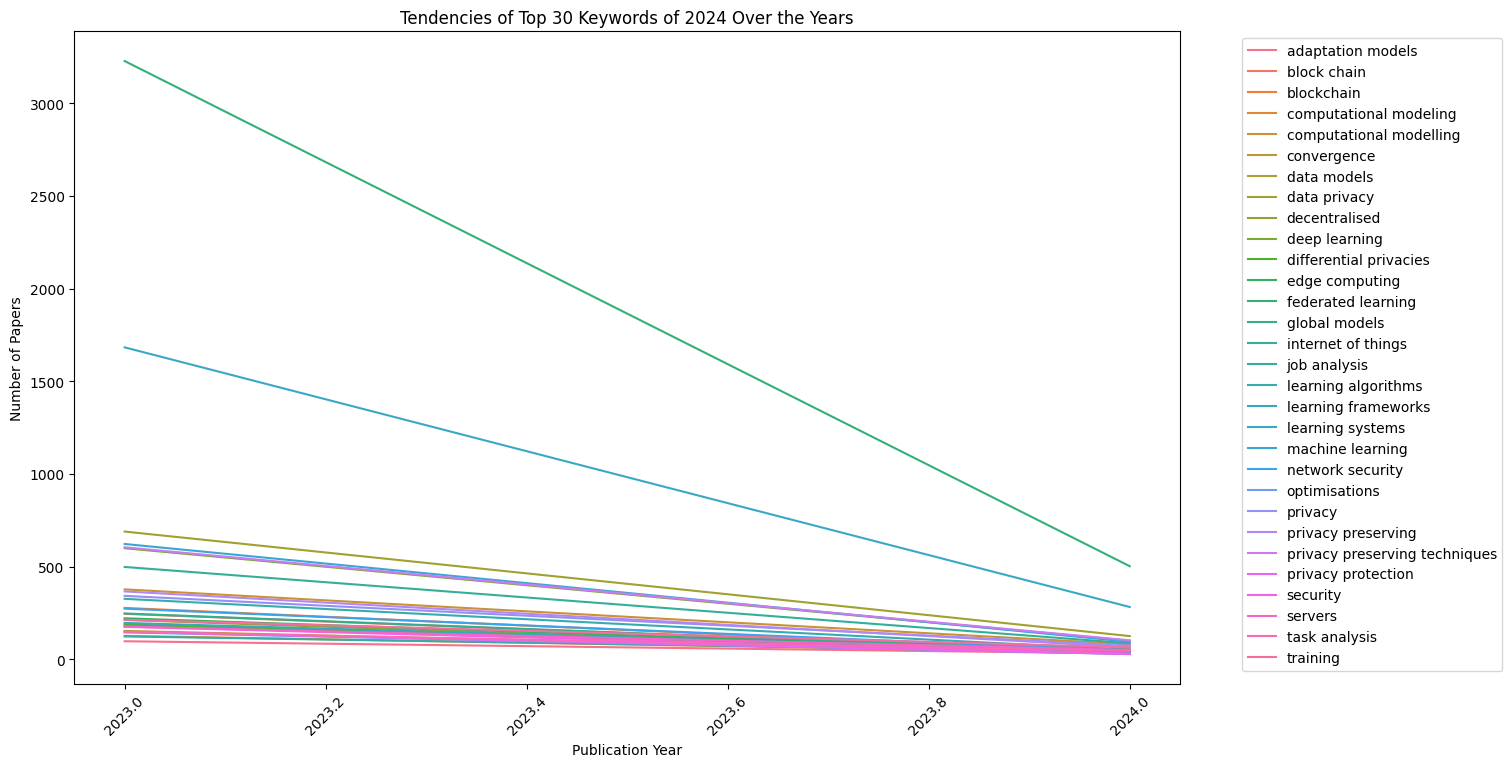

In [84]:
# TENDENCIES OF TOP 30 KEYWORDS OF 2024 OVER THE YEARS

# Connect to the SQLite database
conn = sqlite3.connect('Review.db')

# SQL query to retrieve the top 30 keywords of 2024 and their paper counts over the years
query = """
    SELECT Keyword.name, Paper.publication_year, COUNT(*) AS paper_count
    FROM Keyword
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    WHERE Paper.publication_year <= 2024 AND Paper.publication_year >= 2000
    GROUP BY Keyword.name, Paper.publication_year
    ORDER BY Keyword.name, Paper.publication_year;
"""

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Filter the top 30 keywords of 2024
top_keywords_2024 = df[df['publication_year'] == 2024].groupby('name')['paper_count'].sum().nlargest(30).index

# Filter the DataFrame to include only the top 30 keywords of 2024
df_top_keywords_2024 = df[df['name'].isin(top_keywords_2024)]

# Convert publication_year to integer
df_top_keywords_2024['publication_year'] = df_top_keywords_2024['publication_year'].astype(int)

# Plot the tendencies of the top 30 keywords of 2024 over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top_keywords_2024, x='publication_year', y='paper_count', hue='name')
plt.title('Tendencies of Top 30 Keywords of 2024 Over the Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


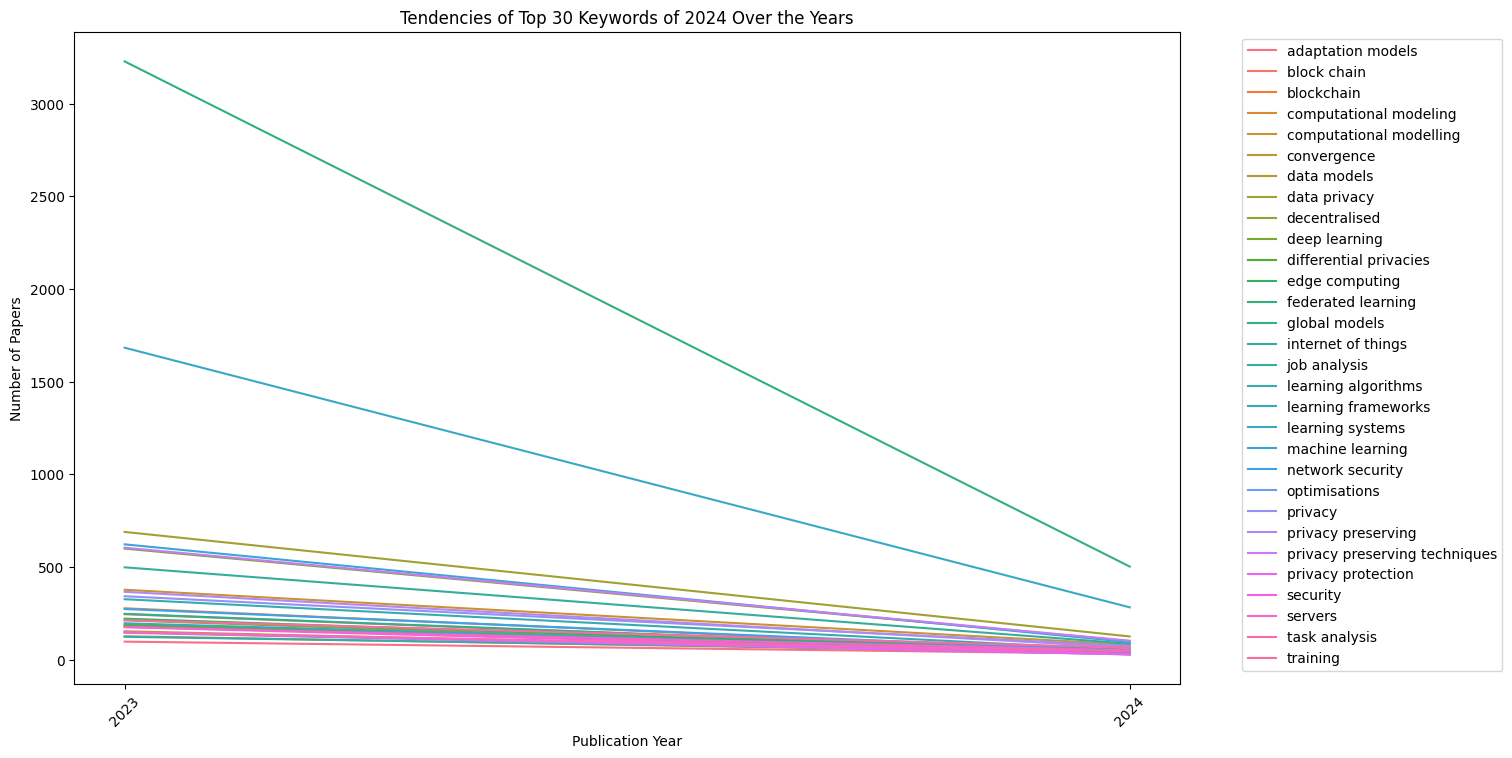

In [25]:
# Connect to the SQLite database
conn = sqlite3.connect('Review.db')

# SQL query to retrieve the top 30 keywords of 2024 and their paper counts over the years
query = """
    SELECT Keyword.name, Paper.publication_year, COUNT(*) AS paper_count
    FROM Keyword
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    WHERE Paper.publication_year <= 2024 AND Paper.publication_year >= 2000
    GROUP BY Keyword.name, Paper.publication_year
    ORDER BY Keyword.name, Paper.publication_year;
"""

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Filter the top 30 keywords of 2024
top_keywords_2024 = df[df['publication_year'] == 2024].groupby('name')['paper_count'].sum().nlargest(30).index

# Filter the DataFrame to include only the top 30 keywords of 2024
df_top_keywords_2024 = df[df['name'].isin(top_keywords_2024)]

# Convert publication_year to integer
# df_top_keywords_2024['publication_year'] = df_top_keywords_2024['publication_year'].astype(int)

# Plot the tendencies of the top 30 keywords of 2024 over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top_keywords_2024, x='publication_year', y='paper_count', hue='name')
plt.title('Tendencies of Top 30 Keywords of 2024 Over the Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis ticks to integers
plt.xticks(df_top_keywords_2024['publication_year'].unique())

plt.show()


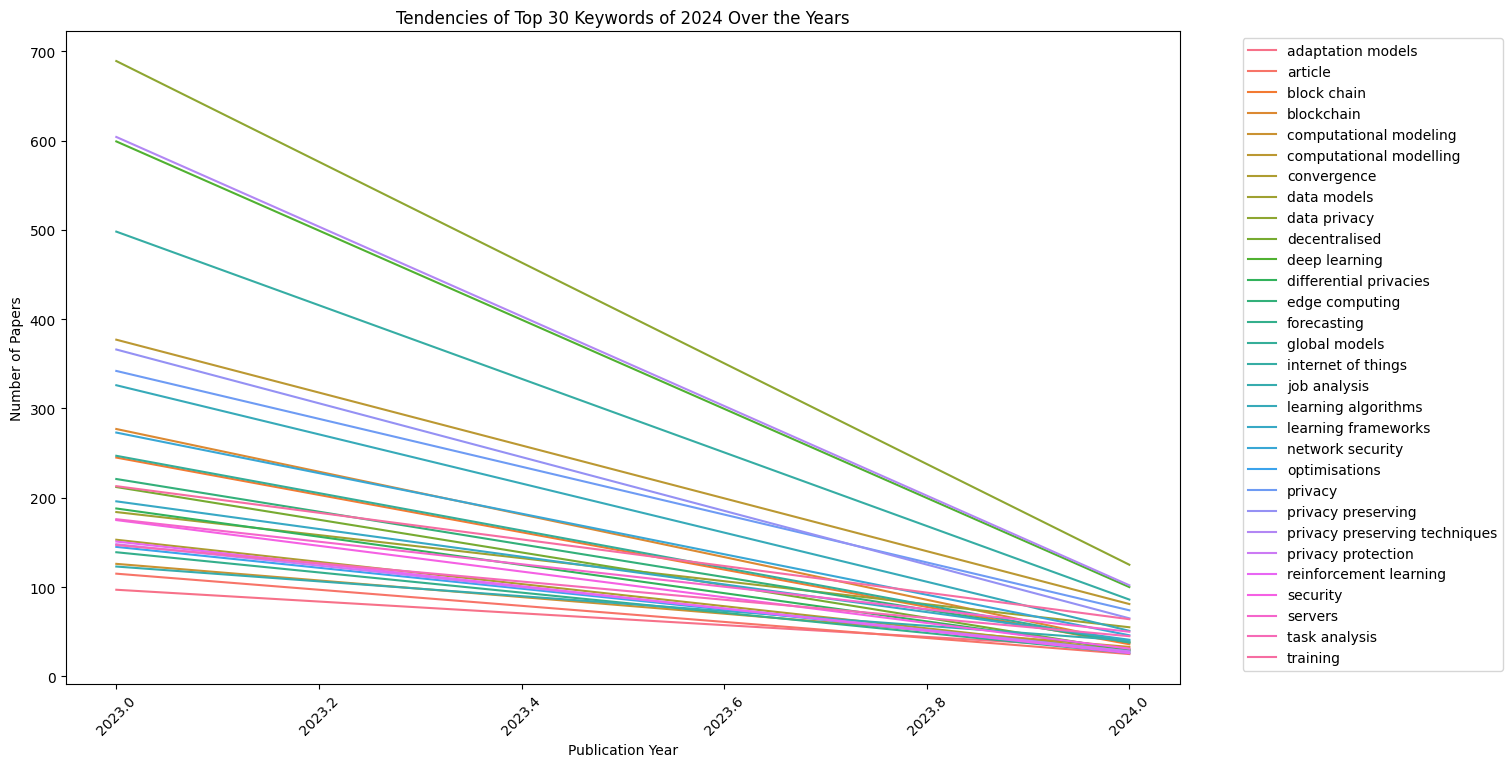

In [28]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('Review.db')

# List of excluded keywords
excluded_keywords_in_plot = ["federated learning", "machine learning", "learning systems"]

# Construct the excluded keywords string for the SQL query
excluded_keywords_str = ', '.join([f'"{keyword}"' for keyword in excluded_keywords_in_plot])

# SQL query to retrieve the top 30 keywords of 2024 excluding the excluded keywords
query = f"""
    SELECT Keyword.name, Paper.publication_year, COUNT(*) AS paper_count
    FROM Keyword
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    WHERE Paper.publication_year <= 2024 AND Paper.publication_year >= 2000
    AND Keyword.name NOT IN ({excluded_keywords_str})
    GROUP BY Keyword.name, Paper.publication_year
    ORDER BY Keyword.name, Paper.publication_year;
"""

# Execute the query and fetch the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Filter the top 30 keywords of 2024 excluding the excluded keywords
top_keywords_2024 = df[df['publication_year'] == 2024].groupby('name')['paper_count'].sum().nlargest(30).index

# Filter the DataFrame to include only the top 30 keywords of 2024 excluding the excluded keywords
df_top_keywords_2024 = df[df['name'].isin(top_keywords_2024)]

# Plot the tendencies of the top 30 keywords of 2024 over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_top_keywords_2024, x='publication_year', y='paper_count', hue='name')
plt.title('Tendencies of Top 30 Keywords of 2024 Over the Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

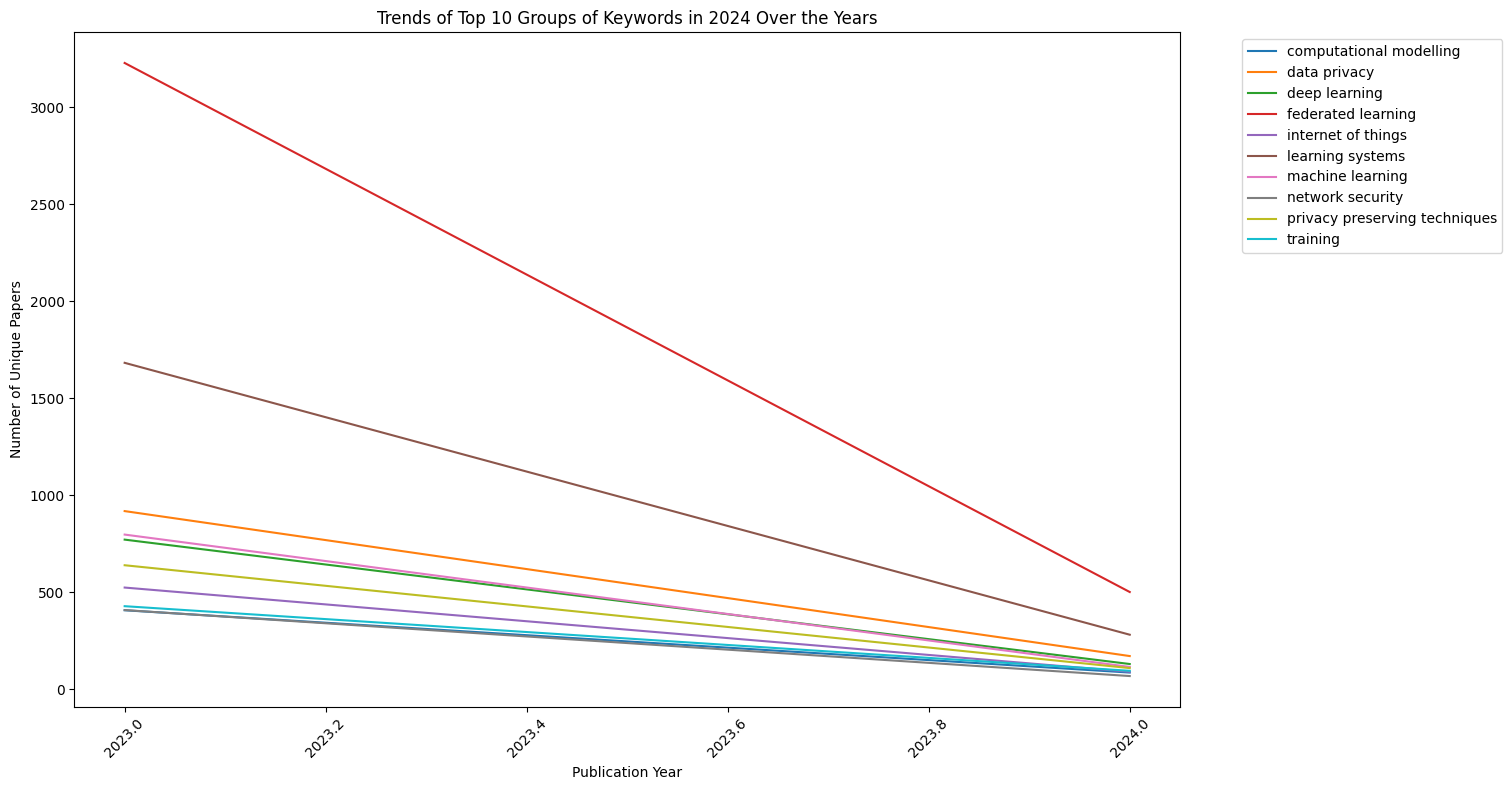

In [22]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('Review.db')

# List of excluded keywords
excluded_keywords_in_plot = ["federated learning", "machine learning", "learning systems"]
excluded_keywords_in_plot = []

# Construct the excluded keywords string for the SQL query
excluded_keywords_str = ', '.join([f'"{keyword}"' for keyword in excluded_keywords_in_plot])

# SQL query to retrieve the top 10 groups of keywords with more unique papers associated in 2024
query_top_groups_2024 = f"""
    SELECT KeywordGroup.name, COUNT(DISTINCT Paper.paper_id) AS unique_paper_count
    FROM KeywordGroup
    JOIN Keyword ON Keyword.group_id = KeywordGroup.group_id
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    WHERE Paper.publication_year = 2024
    AND KeywordGroup.name NOT IN ({excluded_keywords_str})
    GROUP BY KeywordGroup.name
    ORDER BY unique_paper_count DESC
    LIMIT 10;
"""

# Execute the query and fetch the results into a DataFrame
df_top_groups_2024 = pd.read_sql_query(query_top_groups_2024, conn)

# SQL query to retrieve the paper counts for each group of keywords over the years
query_group_trends = f"""
    SELECT KeywordGroup.name, Paper.publication_year, COUNT(DISTINCT Paper.paper_id) AS unique_paper_count
    FROM KeywordGroup
    JOIN Keyword ON Keyword.group_id = KeywordGroup.group_id
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    WHERE KeywordGroup.name IN ({', '.join([f'"{group}"' for group in df_top_groups_2024['name']])})
    AND Paper.publication_year >= 2000
    AND Paper.publication_year <= 2024
    GROUP BY KeywordGroup.name, Paper.publication_year
    ORDER BY KeywordGroup.name, Paper.publication_year;
"""

# Execute the query and fetch the results into a DataFrame
df_group_trends = pd.read_sql_query(query_group_trends, conn)

# Close connection
conn.close()

# Plot the trends of the top 10 groups of keywords with more unique papers associated in 2024 over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_group_trends, x='publication_year', y='unique_paper_count', hue='name')
plt.title('Trends of Top 10 Groups of Keywords in 2024 Over the Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Unique Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

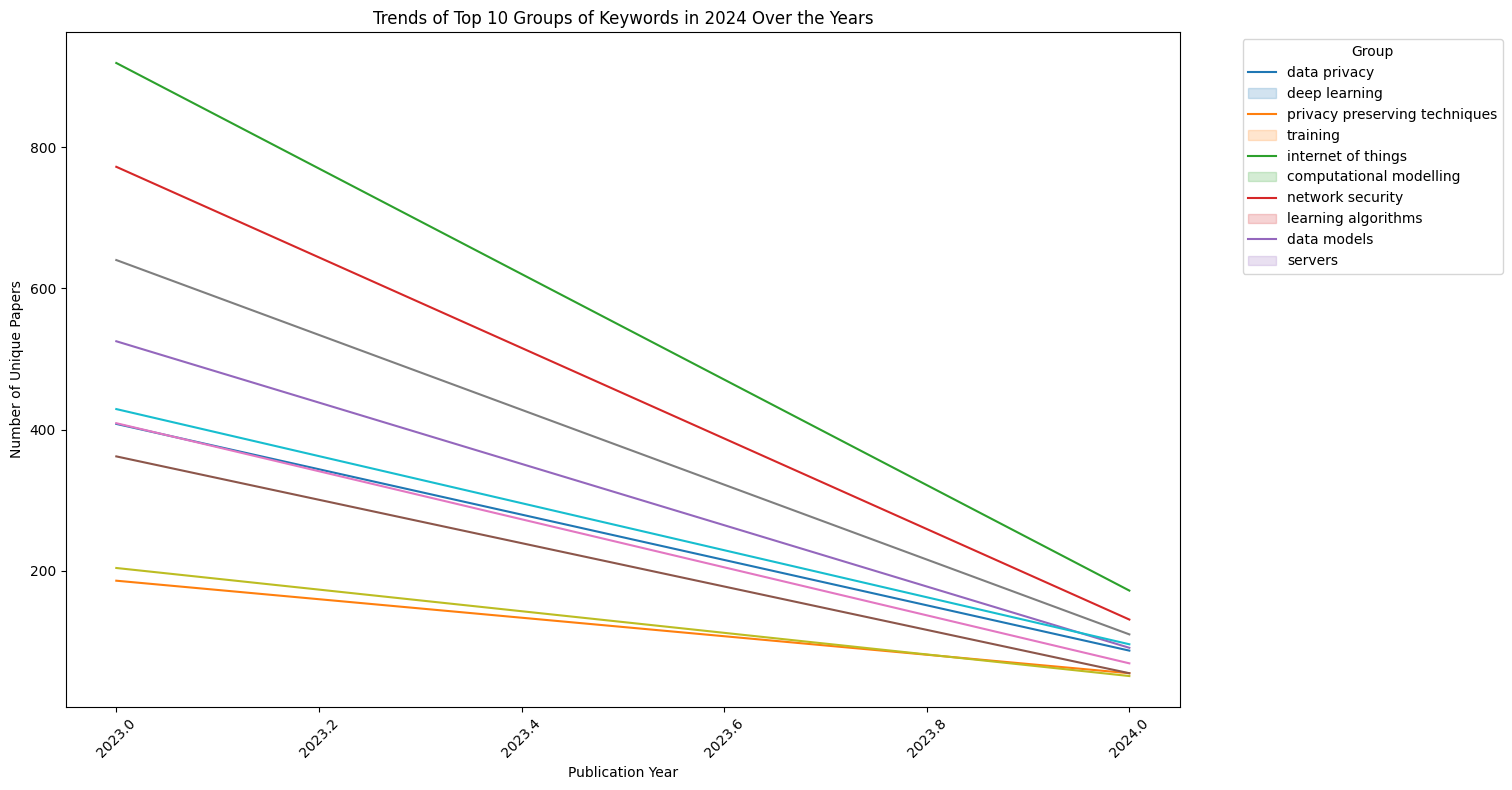

In [25]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('Review.db')

# List of excluded keywords
excluded_keywords_in_plot = ["federated learning", "machine learning", "learning systems"]

# Construct the excluded keywords string for the SQL query
excluded_keywords_str = ', '.join([f'"{keyword}"' for keyword in excluded_keywords_in_plot])

# SQL query to retrieve the top 10 groups of keywords with more unique papers associated in 2024
query_top_groups_2024 = f"""
    SELECT KeywordGroup.name, COUNT(DISTINCT Paper.paper_id) AS unique_paper_count
    FROM KeywordGroup
    JOIN Keyword ON Keyword.group_id = KeywordGroup.group_id
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    WHERE Paper.publication_year = 2024
    AND KeywordGroup.name NOT IN ({excluded_keywords_str})
    GROUP BY KeywordGroup.name
    ORDER BY unique_paper_count DESC
    LIMIT 10;
"""

# Execute the query and fetch the results into a DataFrame
df_top_groups_2024 = pd.read_sql_query(query_top_groups_2024, conn)

# SQL query to retrieve the paper counts for each group of keywords over the years
query_group_trends = f"""
    SELECT KeywordGroup.name, Paper.publication_year, COUNT(DISTINCT Paper.paper_id) AS unique_paper_count
    FROM KeywordGroup
    JOIN Keyword ON Keyword.group_id = KeywordGroup.group_id
    JOIN Paper_Keyword ON Keyword.keyword_id = Paper_Keyword.keyword_id
    JOIN Paper ON Paper_Keyword.paper_id = Paper.paper_id
    WHERE KeywordGroup.name IN ({', '.join([f'"{group}"' for group in df_top_groups_2024['name']])})
    AND Paper.publication_year >= 2000
    AND Paper.publication_year <= 2024
    GROUP BY KeywordGroup.name, Paper.publication_year
    ORDER BY KeywordGroup.name, Paper.publication_year;
"""

# Execute the query and fetch the results into a DataFrame
df_group_trends = pd.read_sql_query(query_group_trends, conn)

# Close connection
conn.close()

# Sort df_top_groups_2024 by unique_paper_count
df_top_groups_2024 = df_top_groups_2024.sort_values(by='unique_paper_count', ascending=False)

# Plot the trends of the top 10 groups of keywords with more unique papers associated in 2024 over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_group_trends, x='publication_year', y='unique_paper_count', hue='name')
plt.title('Trends of Top 10 Groups of Keywords in 2024 Over the Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Unique Papers')
plt.xticks(rotation=45)
plt.tight_layout()

# Manually specify the order of the legend labels based on the sorted df_top_groups_2024
legend_order = df_top_groups_2024['name'].tolist()
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left', labels=legend_order)

plt.show()